## GROUP PROJECT L 

## BOTNET - DETECTION USING DATASCIENCE TECHNIQUES

 # WHAT IS BOTNET 

A botnet is a number of Internet-connected devices, each of which is running one or more bots.
Botnets can be used to perform Distributed Denial-of-Service attacks, steal data, send spam,
and allows the attacker to access the device and its connection.

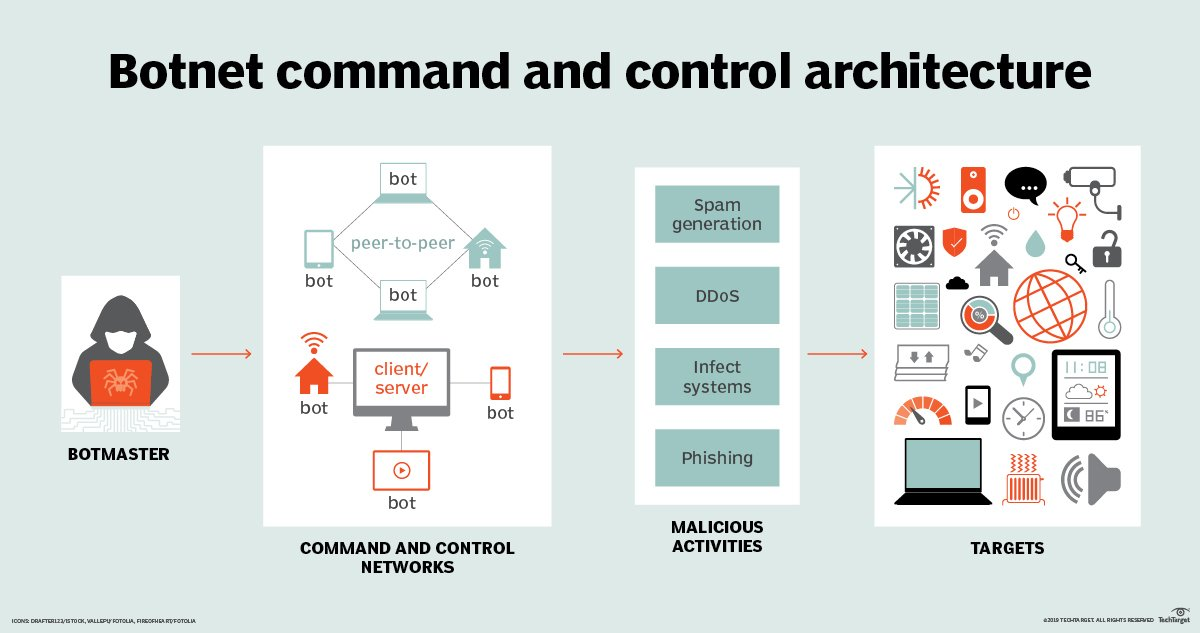

## What is zeus botnet

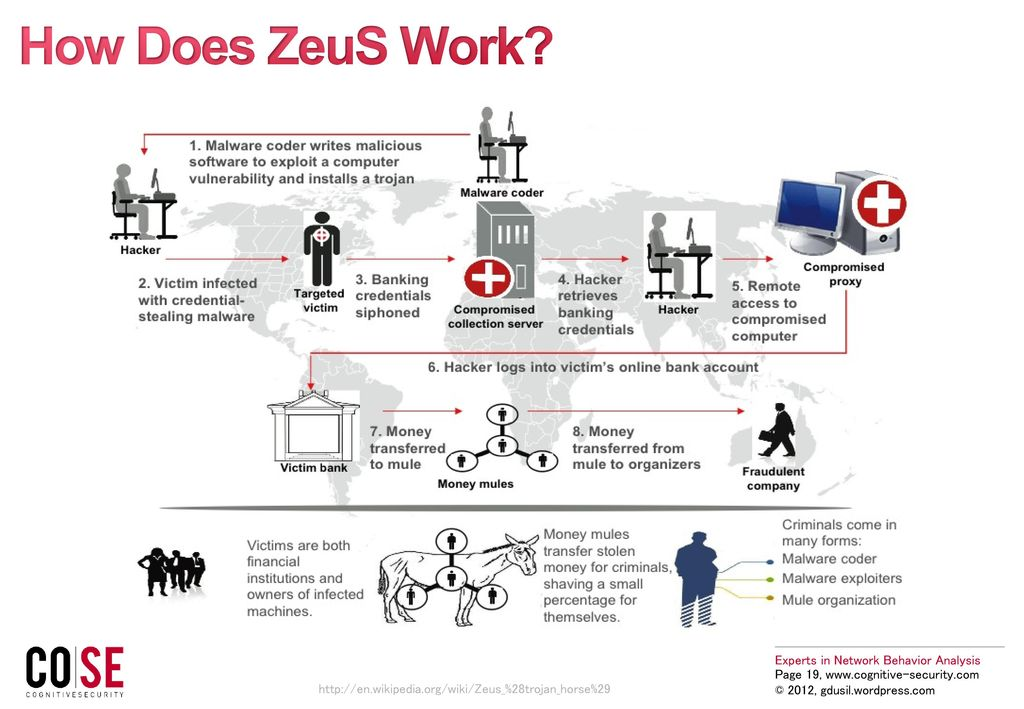

Zeus, ZeuS, or Zbot is a Trojan horse malware package that runs on versions of Microsoft Windows. 
While it can be used to carry out many malicious and criminal tasks, 
it is often used to steal banking information by man-in-the-browser keystroke logging and form grabbing.
It is also used to install the CryptoLocker ransomware.[1] Zeus is spread mainly through drive-by downloads and phishing
schemes. First identified in July 2007 when it was used to steal information from the United States Department of
Transportation,[2] it became more widespread in March 2009. In June 2009 security company Prevx discovered that Zeus had compromised over 74,000 FTP accounts on websites of such companies as the Bank of America, NASA, Monster.com, ABC, Oracle, Play.com, Cisco, Amazon, and BusinessWeek.[3] Similarly to Koobface, Zeus has also been used to trick victims of technical support scams into giving the scam artists money through pop-up messages that claim the user has a virus, when in reality they might have no viruses at all. The scammers may
use programs such as Command prompt or Event viewer to make the user believe that their computer is infected.[4]

# BOTNET DETECTION

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve, auc
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


# Dataset Link
We have taken the dataset from the mentioned link: https://www.aksingh.net/zeus-tracker-data-archived/

# Loading Botnet Flow Statistics

In [2]:
columns = np.arange(0,44) # read the 43 columns
names = ["srcip", "srcport", "dstip", "dstport", "proto",
         "total_fpackets", "total_fvolume", "total_bpackets", "total_bvolume", "min_fpktl",
         "mean_fpktl", "max_fpktl", "std_fpktl", "min_bpktl", "mean_bpktl",
         "max_bpktl", "std_bkptl", "min_fiat", "mean_fiat", "max_fiat",
         "std_fiat", "min_biat", "mean_biat", "max_biat", "std_biat",
         "duration", "min_active", "mean_active", "max_active", "std_active",
         "min_idle", "mean_idle", "max_idle", "std_idle", "sflow_fpackets",
         "sflow_fbytes", "sflow_bpackets", "sflow_bbytes", "fpsh_cnt", "bpsh_cnt",
         "furg_cnt", "burg_cnt", "total_fhlen", "total_bhlen"]
zeus_filename = "all_zeus.csv" # declare filenames
normal_filename = "all_normal.csv" #  declare file names
df_zeus = pd.read_csv(zeus_filename, usecols=columns, names=names) # read files as data frame
df_zeus['is_botnet'] = 1 #  all examples in zeus file are botnets
print(len(df_zeus)) # 
df_zeus.head() #  first 5 columns

524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,10.0.2.19,1039,10.0.2.1,53,17,1,56,1,72,56,...,56,1,72,0,0,0,0,28,20,1
1,10.0.2.2,1037,239.255.255.250,1900,17,3,483,0,0,161,...,161,0,0,0,0,0,0,68,0,1
2,10.0.2.19,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1
3,10.0.2.1,67,10.0.2.19,68,17,2,661,0,0,328,...,661,0,0,0,0,0,0,48,0,1
4,10.0.2.2,1033,239.255.255.250,1900,17,1,161,0,0,161,...,161,0,0,0,0,0,0,28,0,1


# Loading Normal Flow Statistics

In [3]:
normal_df = pd.read_csv(normal_filename, usecols=columns, names=names)
normal_df['is_botnet'] = 0
print(len(normal_df))
df_normal = normal_df.iloc[:len(df_zeus), :]
print(len(df_normal))
df_normal.head(10) #  exactly same thing but not botnet we have 843 rows

843
524


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
0,192.168.0.58,50245,216.58.213.99,443,6,5,729,3,1562,40,...,729,3,1562,1,0,0,0,212,132,0
1,192.168.0.58,50240,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
2,192.168.0.58,50239,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
3,192.168.0.58,50243,216.58.213.99,443,6,6,769,5,2990,40,...,769,5,2990,1,1,0,0,252,212,0
4,192.168.0.58,50261,216.58.206.78,443,6,6,769,5,3009,40,...,769,5,3009,1,1,0,0,252,212,0
5,192.168.0.58,50263,216.58.206.130,443,6,6,781,4,3032,40,...,781,4,3032,1,0,0,0,264,172,0
6,192.168.0.58,50267,40.77.229.141,443,6,17,14162,27,12726,40,...,14162,27,12726,6,13,0,0,692,1092,0
7,192.168.0.58,50269,216.58.212.99,443,6,10,1204,9,4455,40,...,1204,9,4455,4,4,0,0,412,372,0
8,192.168.0.58,50273,191.232.139.2,443,6,14,6178,15,6023,40,...,6178,15,6023,6,9,0,0,572,612,0
9,192.168.0.58,50275,188.121.36.239,80,6,6,696,6,2519,40,...,696,6,2519,1,1,0,0,252,252,0


# Combining All Data

In [4]:
data = pd.concat([df_zeus, df_normal])
print(len(data))
data = data.sample(frac=1)
data.head()

1048


,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
104,192.168.0.58,50490,152.195.53.200,443,6,13,1376,10,5115,40,...,1376,10,5115,4,5,0,0,568,412,0
337,10.0.0.11,1031,192.168.1.4,80,6,5,407,2,396,40,...,203,1,198,1,1,0,0,208,88,1
102,192.168.0.58,50484,216.58.212.66,443,6,10,1204,8,3538,40,...,1204,8,3538,4,4,0,0,412,332,0
216,10.0.1.4,1041,10.0.1.1,53,17,2,119,2,287,59,...,119,2,287,0,0,0,0,48,40,1
274,0.0.0.0,68,255.255.255.255,67,17,2,693,0,0,334,...,693,0,0,0,0,0,0,48,0,1


# Dataset analysis

In [5]:
data[data.isnull().any(axis=1)].head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet


In [6]:
np.sum(data.isnull().any(axis=1))

0

In [7]:
data.isnull().any(axis=0)

srcip             False
srcport           False
dstip             False
dstport           False
proto             False
total_fpackets    False
total_fvolume     False
total_bpackets    False
total_bvolume     False
min_fpktl         False
mean_fpktl        False
max_fpktl         False
std_fpktl         False
min_bpktl         False
mean_bpktl        False
max_bpktl         False
std_bkptl         False
min_fiat          False
mean_fiat         False
max_fiat          False
std_fiat          False
min_biat          False
mean_biat         False
max_biat          False
std_biat          False
duration          False
min_active        False
mean_active       False
max_active        False
std_active        False
min_idle          False
mean_idle         False
max_idle          False
std_idle          False
sflow_fpackets    False
sflow_fbytes      False
sflow_bpackets    False
sflow_bbytes      False
fpsh_cnt          False
bpsh_cnt          False
furg_cnt          False
burg_cnt        

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048 entries, 104 to 119
Data columns (total 45 columns):
srcip             1048 non-null object
srcport           1048 non-null int64
dstip             1048 non-null object
dstport           1048 non-null int64
proto             1048 non-null int64
total_fpackets    1048 non-null int64
total_fvolume     1048 non-null int64
total_bpackets    1048 non-null int64
total_bvolume     1048 non-null int64
min_fpktl         1048 non-null int64
mean_fpktl        1048 non-null int64
max_fpktl         1048 non-null int64
std_fpktl         1048 non-null int64
min_bpktl         1048 non-null int64
mean_bpktl        1048 non-null int64
max_bpktl         1048 non-null int64
std_bkptl         1048 non-null int64
min_fiat          1048 non-null int64
mean_fiat         1048 non-null int64
max_fiat          1048 non-null int64
std_fiat          1048 non-null int64
min_biat          1048 non-null int64
mean_biat         1048 non-null int64
max_biat        

In [9]:
data.describe()

,srcport,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,mean_fpktl,max_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.000000,...,1048.000000,1048.000000,1.048000e+03,1048.000000,1048.000000,1048.0,1048.0,1048.000000,1048.000000,1048.000000
mean,34002.579198,6950.801527,13.294847,25.419847,3925.868321,34.547710,4.344807e+04,105.569656,159.251908,473.715649,...,1632.139313,13.336832,1.625758e+04,2.351145,3.907443,0.0,0.0,881.736641,1233.438931,0.500000
std,21633.969317,10215.669372,5.201378,160.799309,22571.931715,280.688187,4.124589e+05,79.705528,166.769398,1274.711514,...,7293.982042,72.355010,1.056138e+05,10.151610,26.277158,0.0,0.0,6556.541592,11113.394555,0.500239
min,67.000000,53.000000,6.000000,1.000000,54.000000,0.000000,0.000000e+00,40.000000,41.000000,54.000000,...,54.000000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
25%,15684.000000,53.000000,6.000000,1.000000,110.750000,0.000000,0.000000e+00,40.000000,73.000000,94.000000,...,106.750000,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,28.000000,0.000000,0.000000
50%,38529.000000,443.000000,17.000000,2.000000,316.500000,1.000000,1.885000e+02,69.000000,128.000000,207.500000,...,262.000000,1.000000,1.800000e+02,0.000000,0.000000,0.0,0.0,48.000000,20.000000,0.500000
75%,50482.250000,16563.750000,17.000000,10.000000,1244.000000,8.250000,4.003000e+03,161.000000,182.500000,494.000000,...,693.000000,6.000000,2.576750e+03,1.000000,2.000000,0.0,0.0,412.000000,358.000000,1.000000
max,65510.000000,29996.000000,17.000000,4278.000000,479966.000000,7916.000000,1.186256e+07,334.000000,2036.000000,16078.000000,...,78856.000000,1583.000000,2.372511e+06,191.000000,502.000000,0.0,0.0,182920.000000,316652.000000,1.000000


In [10]:
data.head()

,srcip,srcport,dstip,dstport,proto,total_fpackets,total_fvolume,total_bpackets,total_bvolume,min_fpktl,...,sflow_fbytes,sflow_bpackets,sflow_bbytes,fpsh_cnt,bpsh_cnt,furg_cnt,burg_cnt,total_fhlen,total_bhlen,is_botnet
104,192.168.0.58,50490,152.195.53.200,443,6,13,1376,10,5115,40,...,1376,10,5115,4,5,0,0,568,412,0
337,10.0.0.11,1031,192.168.1.4,80,6,5,407,2,396,40,...,203,1,198,1,1,0,0,208,88,1
102,192.168.0.58,50484,216.58.212.66,443,6,10,1204,8,3538,40,...,1204,8,3538,4,4,0,0,412,332,0
216,10.0.1.4,1041,10.0.1.1,53,17,2,119,2,287,59,...,119,2,287,0,0,0,0,48,40,1
274,0.0.0.0,68,255.255.255.255,67,17,2,693,0,0,334,...,693,0,0,0,0,0,0,48,0,1


In [11]:
y=data['is_botnet']
y.value_counts()

1    524
0    524
Name: is_botnet, dtype: int64

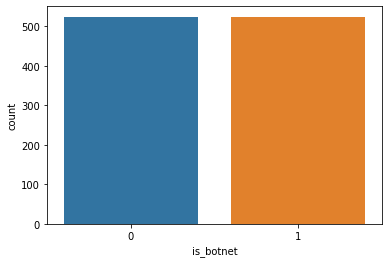

In [12]:

sns.countplot(data= data, x = "is_botnet")
plt.show()

# HEATMAP

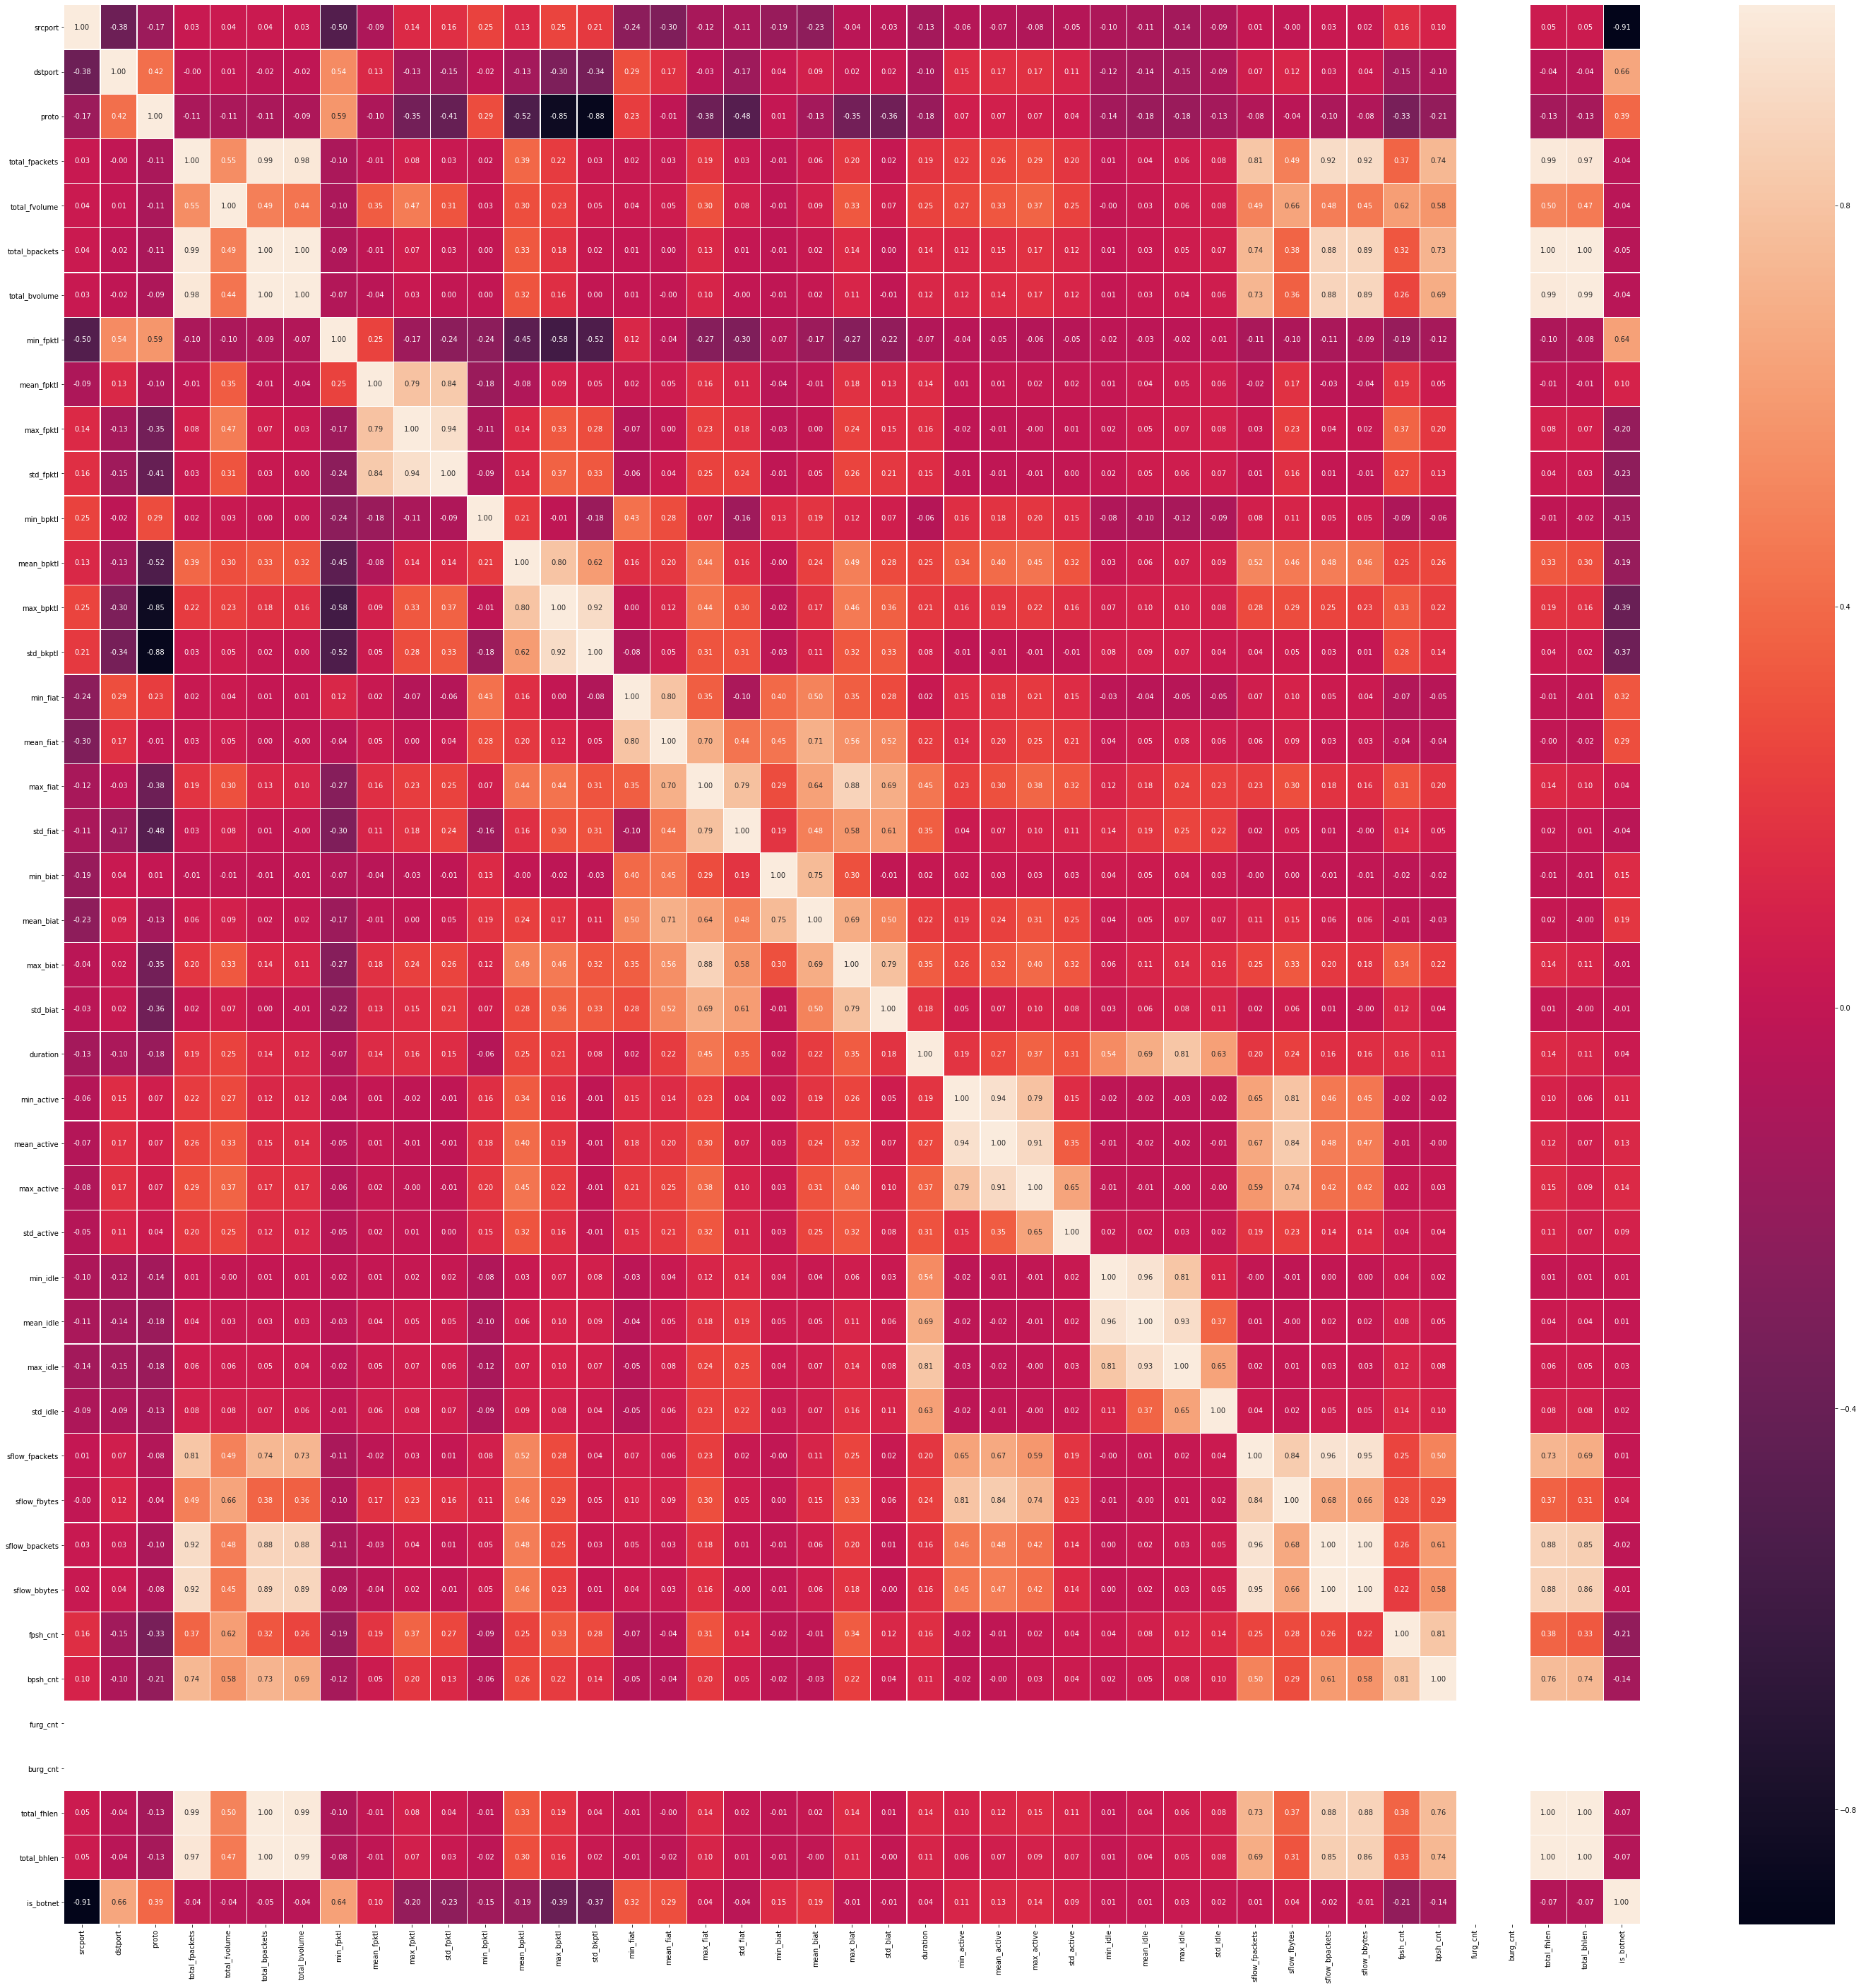

In [13]:
plt.figure(figsize = (50,50))
sns.heatmap(data = data.corr(), annot=True, linewidths=.3, fmt="1.2f")
plt.show()

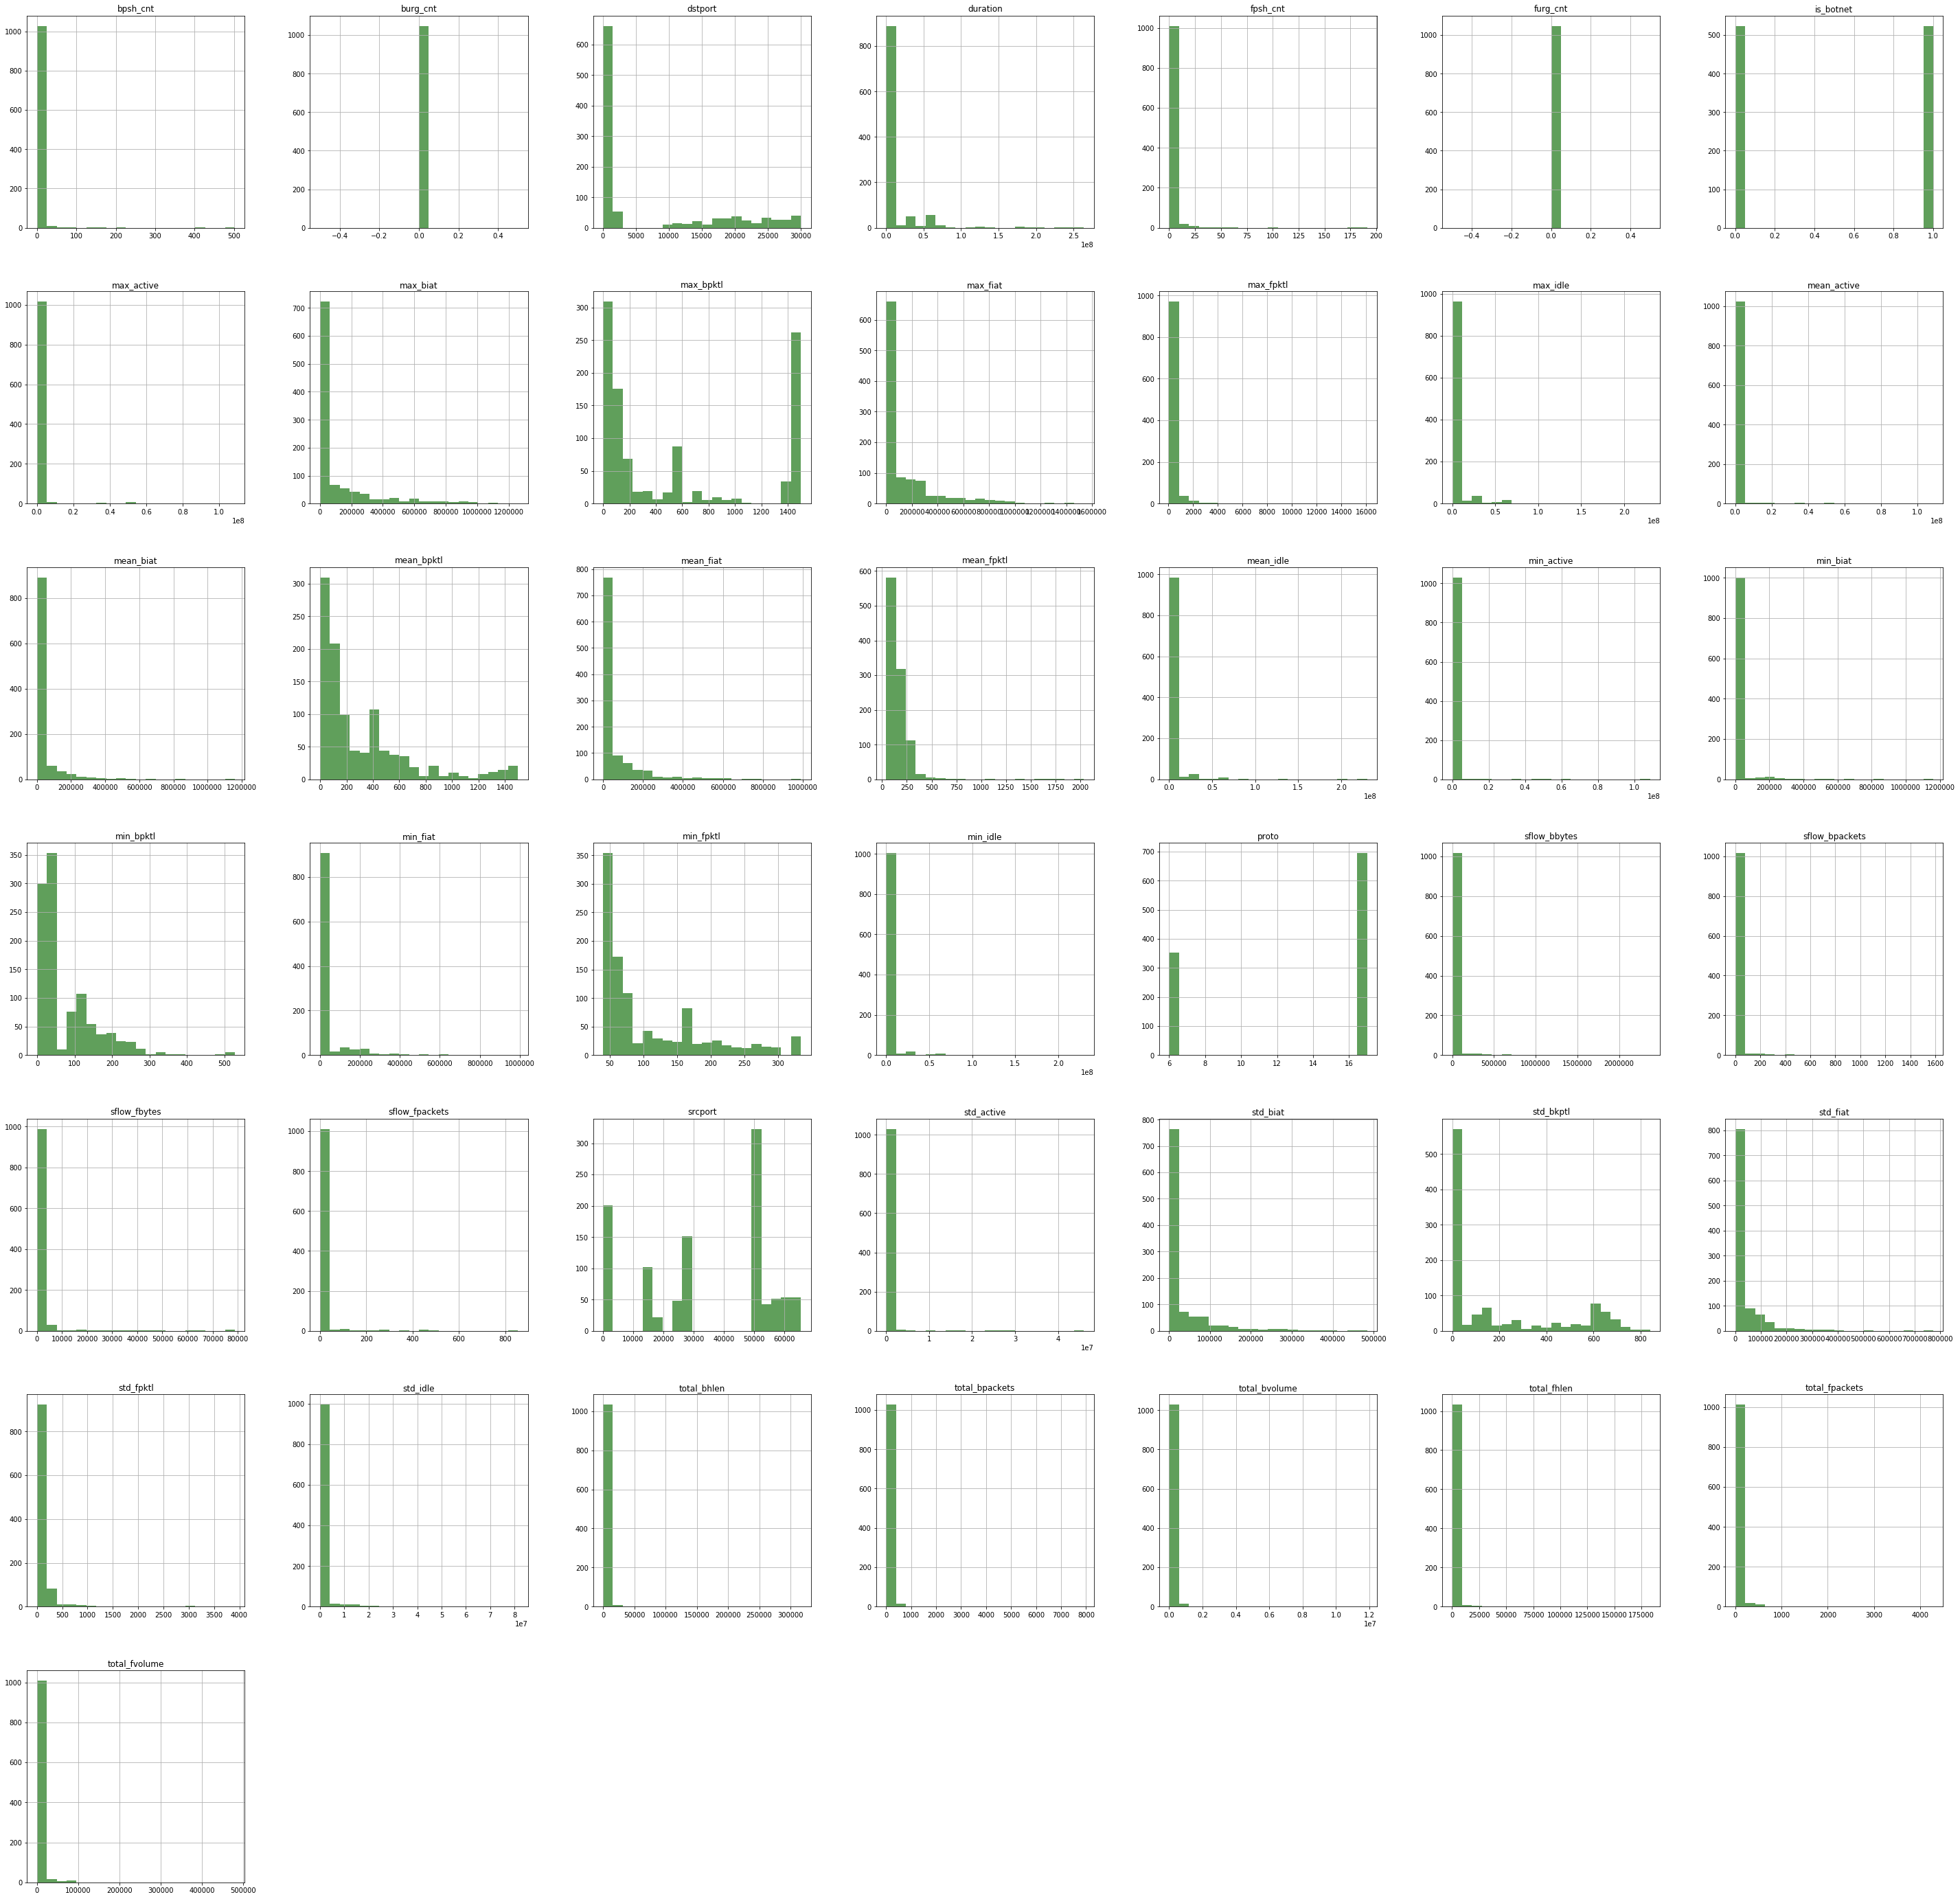

In [14]:
data.hist(figsize=(50,50),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

## FEATURE SELECTION USING EMBEDDED METHOD
The reason we choose embedded method was because they are iterative in a sense that the model training process. Regularization techniques are more most commonly used in these techniques,lassoCV regularization is the basic of all the embedded methods.

In [15]:
#Using the unbalanced data
data_all = pd.concat([df_zeus, normal_df])
data_all=data_all[['duration','max_active','max_biat','max_bpktl','max_fiat','mean_bpktl','mean_fpktl','min_active','min_bpktl','min_fpktl','std_active','std_bkptl','is_botnet']]
data_all.shape
X=data_all.drop(columns=['is_botnet'])
y=data_all.is_botnet

In [16]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 74133.245512
Best score using built-in LassoCV: 0.026605


In [17]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 10 variables


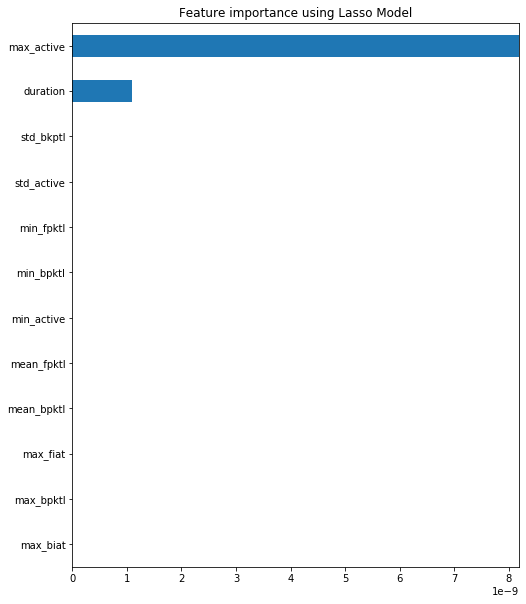

In [18]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
_= plt.title("Feature importance using Lasso Model")

so now our major features are max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_fiat,
max_bpktl,max_fiat,max_bpktl,max_biat, **we will work on these feature** 

# Correlation between the features

In [19]:
feature_coorelation=data_all[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl',
'max_bpktl','max_fiat','max_biat']]

In [20]:
feature_coorelation.head()

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
0,165709,165709,0,0,56,72,165709,56,72,72,0,0
1,0,6007884,0,0,161,-1,0,161,-1,-1,0,0
2,0,0,0,0,161,-1,0,161,-1,-1,0,0
3,113348,113348,0,0,328,-1,113348,330,-1,-1,113348,0
4,0,0,0,0,161,-1,0,161,-1,-1,0,0


In [21]:
feature_corrmat = feature_coorelation.corr() 
feature_corrmat

,max_active,duration,std_bkptl,std_active,min_fpktl,min_bpktl,min_active,mean_fpktl,mean_bpktl,max_bpktl,max_fiat,max_biat
max_active,1.000000,0.372859,0.016296,0.651788,-0.045511,0.151538,0.795649,0.039104,0.447640,0.229413,0.388529,0.405977
duration,0.372859,1.000000,0.131300,0.313718,-0.034474,-0.104341,0.196279,0.176328,0.266588,0.241806,0.470776,0.368507
std_bkptl,0.016296,0.131300,1.000000,0.014147,-0.410755,-0.259464,0.008373,0.125293,0.632449,0.924975,0.372762,0.375903
std_active,0.651788,0.313718,0.014147,1.000000,-0.039792,0.111927,0.155976,0.029676,0.318357,0.165741,0.323247,0.324432
min_fpktl,-0.045511,-0.034474,-0.410755,-0.039792,1.000000,-0.272846,-0.028359,0.288638,-0.385981,-0.472906,-0.198077,-0.203928
min_bpktl,0.151538,-0.104341,-0.259464,0.111927,-0.272846,1.000000,0.121935,-0.233169,0.135017,-0.099476,-0.030805,0.019779
min_active,0.795649,0.196279,0.008373,0.155976,-0.028359,0.121935,1.000000,0.024699,0.342746,0.172052,0.240328,0.265044
mean_fpktl,0.039104,0.176328,0.125293,0.029676,0.288638,-0.233169,0.024699,1.000000,-0.026342,0.156193,0.219069,0.224105
mean_bpktl,0.447640,0.266588,0.632449,0.318357,-0.385981,0.135017,0.342746,-0.026342,1.000000,0.810504,0.474130,0.516028
max_bpktl,0.229413,0.241806,0.924975,0.165741,-0.472906,-0.099476,0.172052,0.156193,0.810504,1.000000,0.484424,0.503484


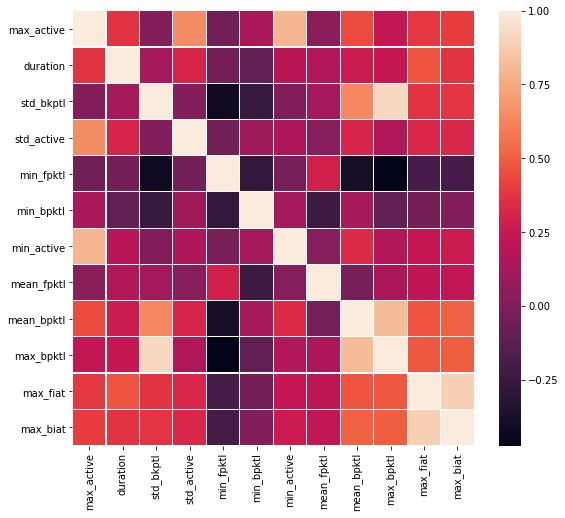

In [22]:
f, ax = plt.subplots(figsize =(9, 8)) 
_ = sns.heatmap(feature_corrmat, ax = ax, linewidths = 0.2) 

Paiplot is used to visualize the correlation diagonals are histogram it means variables are related to each and correlation
are scatterplot, it give the realtionship between other variables

<Figure size 2160x1800 with 0 Axes>

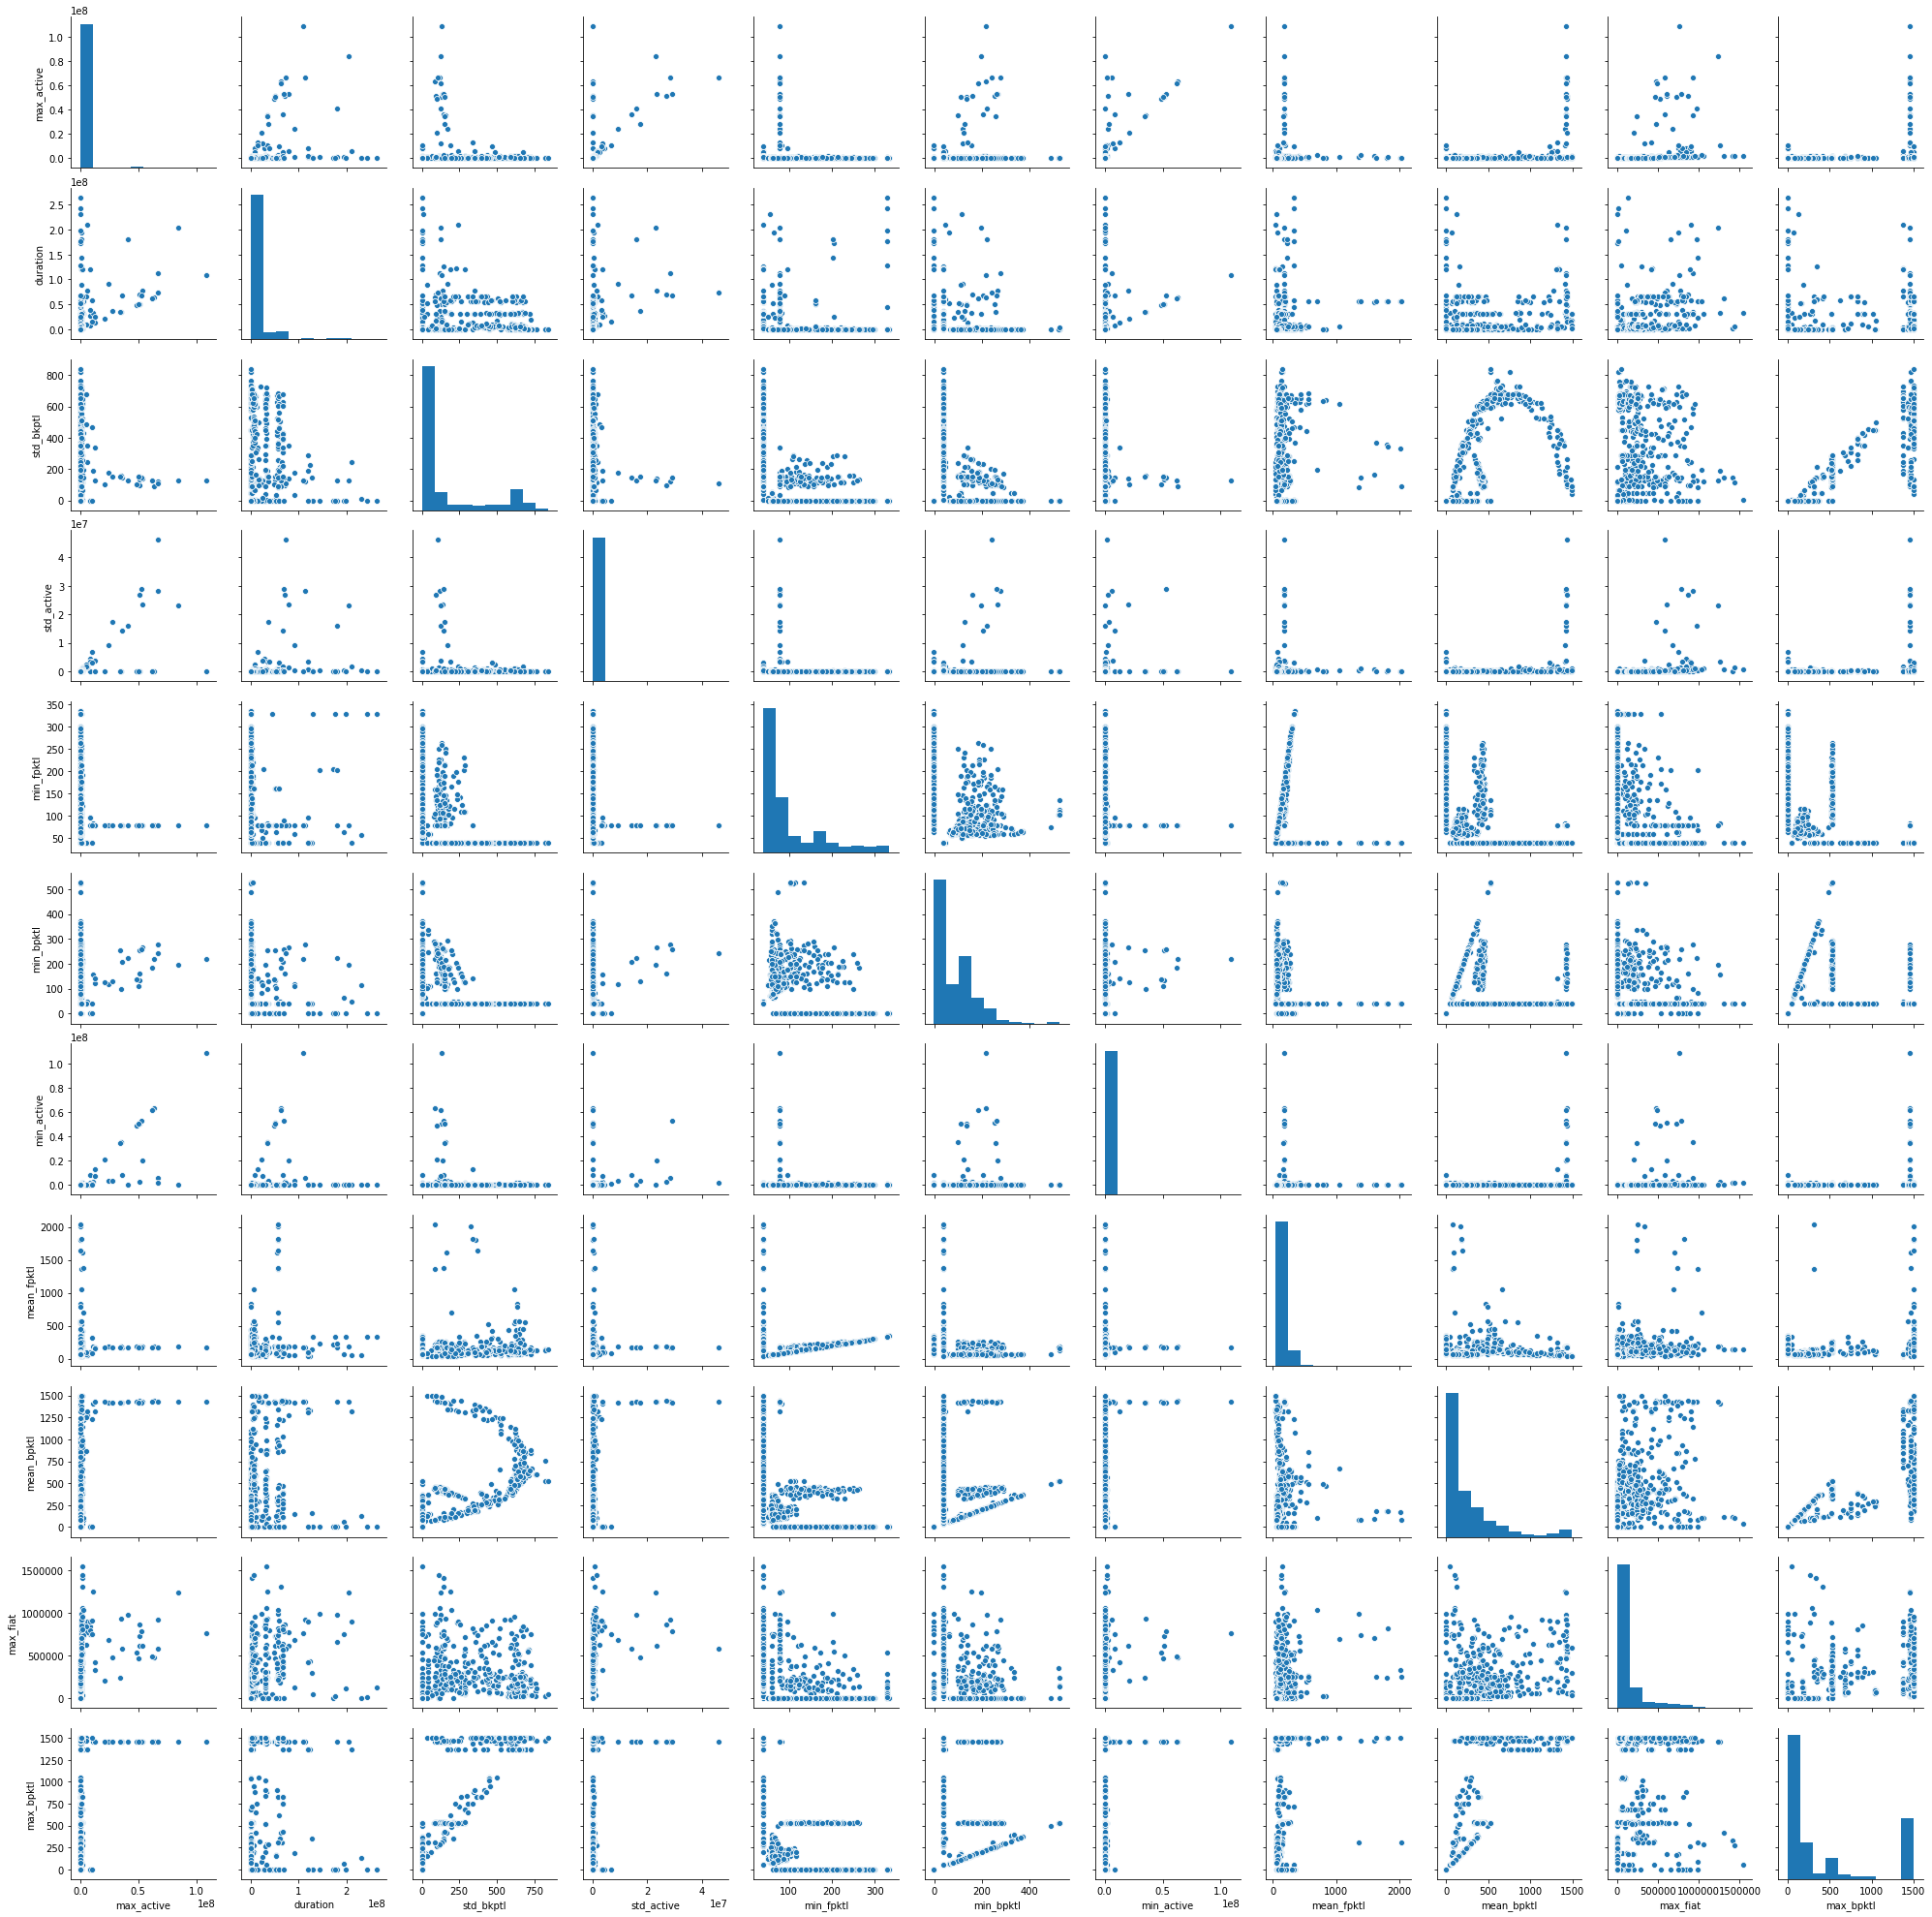

In [23]:
plt.figure(figsize=(30,25))
sns.pairplot(feature_coorelation[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl']])
plt.show()

In [24]:
new_df=pd.DataFrame(data_all[['max_active','duration','std_bkptl','std_active','min_fpktl','min_bpktl','min_active','mean_fpktl','mean_bpktl','max_fiat',
'max_bpktl','is_botnet']])

#### Preparing data to apply SMOTE technique

In [25]:
X=new_df.drop(columns=['is_botnet'])
y=new_df.is_botnet

#Splitting the dataset into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# checking shapes of each
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

X_train shape:  (1025, 11)
y_train shape:  (1025,)
X_test shape:  (342, 11)
y_test.shape:  (342,)


In [26]:
# SMOTE technique on train
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_sample(X_train, y_train)

In [27]:
print("Before SMOTE : ", Counter(y_train))
print("After SMOTE : ", Counter(y_train_smote))

Before SMOTE :  Counter({0: 640, 1: 385})
After SMOTE :  Counter({0: 640, 1: 640})


In [28]:
X_test_smote, y_test_smote = smote.fit_sample(X_test, y_test)

In [29]:
print("Before SMOTE : ", Counter(y_test))
print("After SMOTE : ", Counter(y_test_smote))

Before SMOTE :  Counter({0: 203, 1: 139})
After SMOTE :  Counter({0: 203, 1: 203})


# BernoulliNB Training

In [30]:
# checking all 45 column names in the dataset
print(df_zeus.columns)

Index(['srcip', 'srcport', 'dstip', 'dstport', 'proto', 'total_fpackets',
       'total_fvolume', 'total_bpackets', 'total_bvolume', 'min_fpktl',
       'mean_fpktl', 'max_fpktl', 'std_fpktl', 'min_bpktl', 'mean_bpktl',
       'max_bpktl', 'std_bkptl', 'min_fiat', 'mean_fiat', 'max_fiat',
       'std_fiat', 'min_biat', 'mean_biat', 'max_biat', 'std_biat', 'duration',
       'min_active', 'mean_active', 'max_active', 'std_active', 'min_idle',
       'mean_idle', 'max_idle', 'std_idle', 'sflow_fpackets', 'sflow_fbytes',
       'sflow_bpackets', 'sflow_bbytes', 'fpsh_cnt', 'bpsh_cnt', 'furg_cnt',
       'burg_cnt', 'total_fhlen', 'total_bhlen', 'is_botnet'],
      dtype='object')


In [32]:
#X_train, X_test, y_train, y_test = train_test_split(feature_coorelation, Class_label, test_size=0.25, random_state=100)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1025, 11), (342, 11), (1025,), (342,))

In [33]:
Br=BernoulliNB()
Br= Br.fit(X_train , y_train)
Br

BernoulliNB()

In [34]:
y_pred1 = Br.predict(X_test)
#print('Accuracy score= {:.2f}'.format(Br.score(y_pred1, y_test)))

In [35]:
ytest_accscore=accuracy_score(y_test,y_pred1);
print(ytest_accscore)

0.8070175438596491


# BernoulliNB Testing Precision, Recall, F1

In [36]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.76      1.00      0.86       203
           1       0.99      0.53      0.69       139

    accuracy                           0.81       342
   macro avg       0.87      0.76      0.78       342
weighted avg       0.85      0.81      0.79       342





In [37]:
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred1))
print('\n')

Confusion Matrix
[[202   1]
 [ 65  74]]




# Decision Tree Testing data ROC CURVE

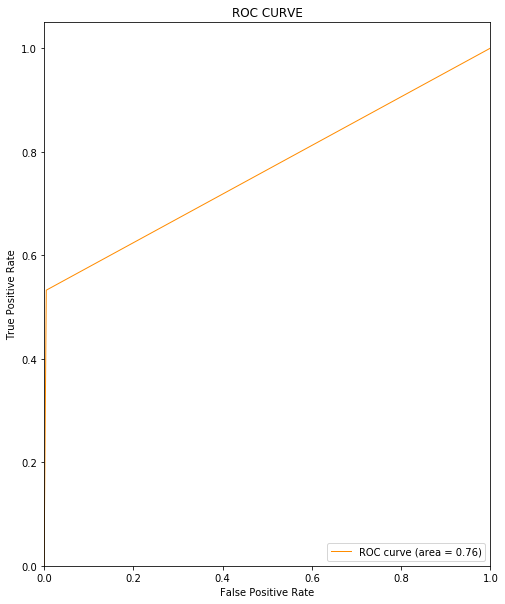

In [38]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)


plt.figure()

plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()

# Decision Tree

In [39]:
imputer = SimpleImputer(strategy='most_frequent')
botnet_data = imputer.fit_transform(data_all)

pd.DataFrame(data=botnet_data, columns=data_all.columns).head()

,duration,max_active,max_biat,max_bpktl,max_fiat,mean_bpktl,mean_fpktl,min_active,min_bpktl,min_fpktl,std_active,std_bkptl,is_botnet
0,165709,165709,0,72,0,72,56,165709,72,56,0,0,1
1,6007884,0,0,-1,0,-1,161,0,-1,161,0,0,1
2,0,0,0,-1,0,-1,161,0,-1,161,0,0,1
3,113348,113348,0,-1,113348,-1,330,113348,-1,328,0,0,1
4,0,0,0,-1,0,-1,161,0,-1,161,0,0,1


In [40]:

enc_X = OrdinalEncoder()
enc_y = LabelEncoder()

In [41]:
X=enc_X.fit_transform(new_df.drop(columns=['is_botnet']))
y=enc_y.fit_transform(new_df.is_botnet)

In [42]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.25, random_state=100)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((1025, 11), (342, 11), (1025,), (342,))

In [43]:

clf=DecisionTreeClassifier(random_state=142,max_depth=5)
clf.fit(X_train1 , y_train1)

DecisionTreeClassifier(max_depth=5, random_state=142)

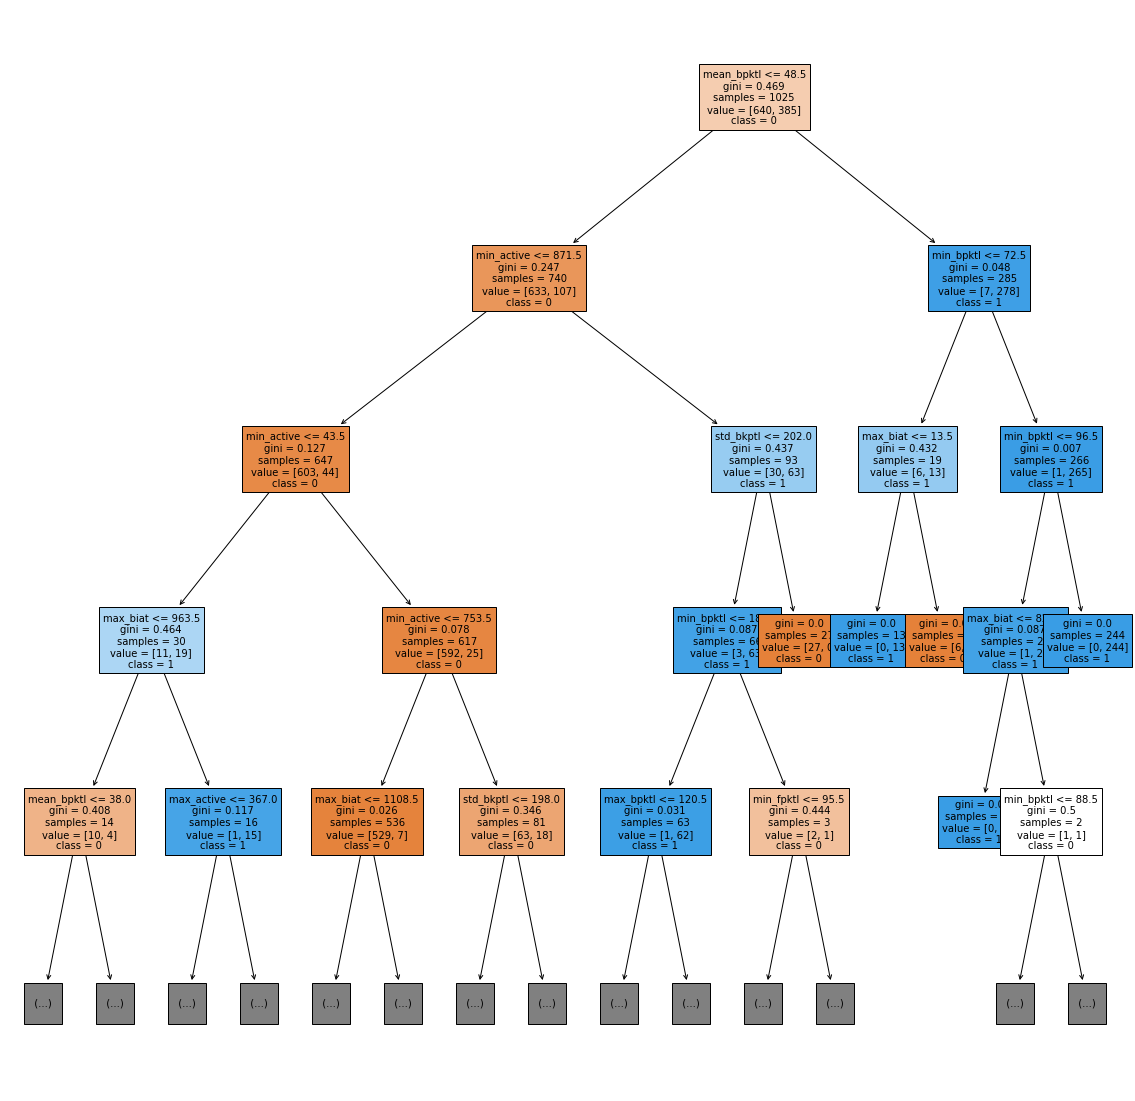

In [44]:
# Visualize the tree structure
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, max_depth=4, filled=True, fontsize=10, 
               feature_names=data_all.columns[1:], class_names=enc_y.classes_.astype(str))
plt.show()

In [45]:
y_dec_tree1 = clf.predict(X_test1)

In [46]:
ytest_accscore=accuracy_score(y_test1,y_dec_tree1);
print('Accuracy Score of decision tree ',ytest_accscore)

Accuracy Score of decision tree  0.9853801169590644


# Decision Tree Testing - Precision, Recall, F1

In [47]:
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test1, y_dec_tree1)
print(CR)

Precision, Recall, F1


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       203
           1       0.97      0.99      0.98       139

    accuracy                           0.99       342
   macro avg       0.98      0.99      0.98       342
weighted avg       0.99      0.99      0.99       342



In [48]:
print('Confusion Matrix')
print(confusion_matrix(y_test1,y_dec_tree1))
print('\n')

Confusion Matrix
[[199   4]
 [  1 138]]




### KNN Classifier

In [49]:
# Create and training a KNN classifier model with neighbors 20
knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy for 20 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

Testing accuracy for 20 neighbors is:  0.8918128654970761

Confusion Matrix
 col_0        0    1
is_botnet          
0          190   13
1           24  115


In [50]:
# Create and training a KNN classifier model with neighbors 3
knn1 = KNeighborsClassifier(n_neighbors = 3)
knn1.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = knn1.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy 3 neighbors is: ', accuracy)
print("\nConfusion Matrix\n",pd.crosstab(y_test,y_pred))

Testing accuracy 3 neighbors is:  0.9269005847953217

Confusion Matrix
 col_0        0    1
is_botnet          
0          193   10
1           15  124


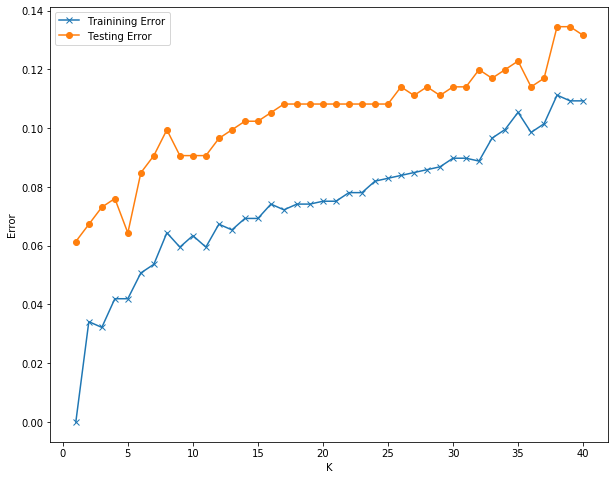

In [52]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    k = KNeighborsClassifier(n_neighbors = i)
    k.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(k.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(k.predict(X_test), y_test))

plt.rcParams['figure.figsize'] = (10 , 8)
# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [53]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 55)}

# Create the machine learning model
knn3 = KNeighborsClassifier()
knn3_clf = GridSearchCV(knn3, parameter_grid, scoring='accuracy', cv=10)
knn3_clf.fit(X_train, y_train)

# Identify the best parameter(s)
print('Best K value: ', knn3_clf.best_params_['n_neighbors'])
print('The accuracy: ', knn3_clf.best_score_)

Best K value:  3
The accuracy:  0.9424519322292024


Both the training and testing error increases as the neighbors increase. Error gets introduced as the values of neighbors increase. The model is more stable when there are 3 neighbors.

# NEURAL_NETWORK : Multi-layer Perceptron (MLP) 

In [54]:
abc = MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5, 2), random_state=1)

abc.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [55]:
# Use the model to predict testing data
y_pred = abc.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy neural network  is: ', accuracy)

Testing accuracy neural network  is:  0.5935672514619883


In [56]:
abc.fit(X_test_smote, y_test_smote)
y_predict = abc.predict(X_train)
print(accuracy_score(y_train, y_predict))

0.624390243902439


## neural_network precission and recall 

In [58]:
print("Precision, Recall, F1 BEFORE SMOTE ")
print('\n')
CR=classification_report(y_test1, y_pred)
print(CR)


Precision, Recall, F1 BEFORE SMOTE 


              precision    recall  f1-score   support

           0       0.59      1.00      0.74       203
           1       0.00      0.00      0.00       139

    accuracy                           0.59       342
   macro avg       0.30      0.50      0.37       342
weighted avg       0.35      0.59      0.44       342



In [59]:
print('Confusion Matrix')
print(confusion_matrix(y_test1,y_pred))
print('\n')

Confusion Matrix
[[203   0]
 [139   0]]




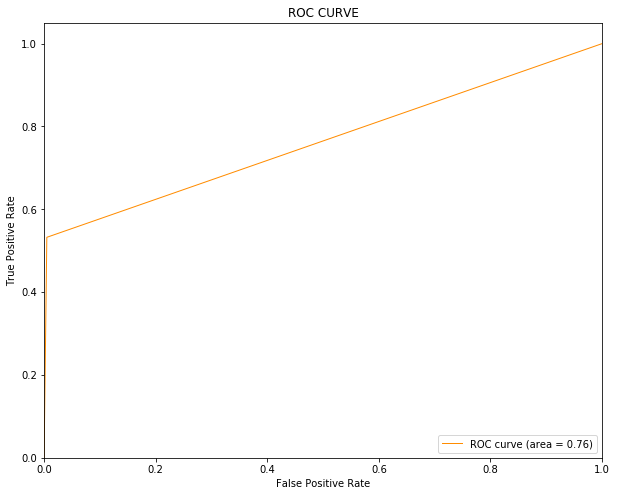

In [60]:
xyz, oop, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(xyz, oop)


plt.figure()

plt.plot(xyz, oop, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')

plt.legend(loc="lower right")

plt.show()

#### Comparing results of Decision tree with BernoulliNB using t-test

In [61]:
scores_bnb = cross_val_score(Br, X, y, cv=10)
print('Accuracy range for BernoulliNB classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_bnb.min(), scores_bnb.max(), scores_bnb.mean(), scores_bnb.std()))

scores_dtree = cross_val_score(clf, X, y, cv=10)
print('Accuracy range for Decision Tree: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_dtree.min(), scores_dtree.max(), scores_dtree.mean(), scores_dtree.std()))

scores_knn = cross_val_score(knn1, X, y, cv=10)
print('Accuracy range for Knn with best neighbor: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_knn.min(), scores_knn.max(), scores_knn.mean(), scores_knn.std()))

scores_nn = cross_val_score(abc, X, y, cv=10)
print('Accuracy range for multi layer percepton classifier: [%.4f, %.4f]; mean: %.4f; std: %.4f\n'% (scores_nn.min(), scores_nn.max(), scores_nn.mean(), scores_nn.std()))

Accuracy range for BernoulliNB classifier: [0.7794, 0.8759]; mean: 0.8310; std: 0.0315

Accuracy range for Decision Tree: [0.8905, 0.9926]; mean: 0.9635; std: 0.0292

Accuracy range for Knn with best neighbor: [0.8540, 0.9927]; mean: 0.9627; std: 0.0391

Accuracy range for multi layer percepton classifier: [0.3796, 0.8613]; mean: 0.7836; std: 0.1376



When we look at the accuracy range for the four models is best for Knn algorithm and could be considered in our approach. 

In [62]:
t, p = ttest_ind(scores_knn, scores_bnb)
print ('t, p: %.4f, %.6f\n' % (t, p))

t1, p1 = ttest_ind(scores_knn, scores_dtree)
print ('t1, p1: %.4f, %.6f\n' % (t1, p1))

t3, p3 = ttest_ind(scores_knn, scores_nn)
print ('t3, p3: %.4f, %.6f\n' % (t3, p3))

t, p: 7.8701, 0.000000

t1, p1: -0.0459, 0.963908

t3, p3: 3.7576, 0.001441



When we look t-test scores considering the significance level as 0.05 it is evident that KNN has better probability of detecting a botnet as compared to BernoulliNB and neural network. It can be considered the probability of Knn and Decision Tree will be similar i.e. their performance.

## COMPARISION OF RESULTS 

In [63]:
x = PrettyTable()
print('\n')
print("Deatiled Performance of the all models")
x.field_names = ["Model", "Accuracy"]

x.add_row(["DecisionTreeClassifier", 0.985])
x.add_row(["BernoulliNB", 0.80])
x.add_row(["Neural network : multi layer percepton classifier before smote ", 0.593])
x.add_row(["Neural network : multi layer percepton classifier after smote ", 0.624])
x.add_row(["k nearest neighbours ", 0.932])
print(x)
print('\n')



Deatiled Performance of the all models
+-----------------------------------------------------------------+----------+
|                              Model                              | Accuracy |
+-----------------------------------------------------------------+----------+
|                      DecisionTreeClassifier                     |  0.985   |
|                           BernoulliNB                           |   0.8    |
| Neural network : multi layer percepton classifier before smote  |  0.593   |
|  Neural network : multi layer percepton classifier after smote  |  0.624   |
|                      k nearest neighbours                       |  0.932   |
+-----------------------------------------------------------------+----------+




In [64]:
x = PrettyTable()
print('\n')
print("Best Models.")
x.field_names = ["Models", "Accuracy"]
x.add_row(["DecisionTreeClassifier", 0.985])
x.add_row(["BernoulliNB", 0.80])
x.add_row(["k nearest neighbours ", 0.932])
print(x)
print('\n')



Best Models.
+------------------------+----------+
|         Models         | Accuracy |
+------------------------+----------+
| DecisionTreeClassifier |  0.985   |
|      BernoulliNB       |   0.8    |
| k nearest neighbours   |  0.932   |
+------------------------+----------+




In [65]:
x = PrettyTable()
print('\n')
x.field_names = ["Model", "Accuracy"]
x.add_row(["RandomForestClassifier",0.985])
print(x)
print('\n')



+------------------------+----------+
|         Model          | Accuracy |
+------------------------+----------+
| RandomForestClassifier |  0.985   |
+------------------------+----------+




In [66]:
Class_label=data_all.is_botnet
Features_train=data_all.drop(columns=['is_botnet'])

In [67]:
Features_train

,duration,max_active,max_biat,max_bpktl,max_fiat,mean_bpktl,mean_fpktl,min_active,min_bpktl,min_fpktl,std_active,std_bkptl
0,165709,165709,0,72,0,72,56,165709,72,56,0,0
1,6007884,0,0,-1,0,-1,161,0,-1,161,0,0
2,0,0,0,-1,0,-1,161,0,-1,161,0,0
3,113348,113348,0,-1,113348,-1,330,113348,-1,328,0,0
4,0,0,0,-1,0,-1,161,0,-1,161,0,0
5,44185834,48960,0,-1,48960,-1,335,46014,-1,328,2083,0
6,6006266,0,0,-1,0,-1,161,0,-1,161,0,0
7,696065,696065,0,214,0,214,54,696065,214,54,0,0
8,60198820,242456,84315,348,209947,198,81,0,48,40,171442,212
9,359112,359112,121049,686,194783,170,74,359112,40,40,0,288


In [68]:
from sklearn.ensemble import RandomForestClassifier
Ran_For= RandomForestClassifier(n_estimators=100,max_depth=15, random_state=11,max_leaf_nodes=10)
Ran_For= Ran_For.fit(Features_train , Class_label)
Ran_For

RandomForestClassifier(max_depth=15, max_leaf_nodes=10, random_state=11)

# By entering the data of '0' is_botnet for prediction

In [74]:
new_data=pd.read_csv('prediction.csv')
new_data

,30364220,2382598,728847,1470,728641,844,137,106288,40,50368,871029,677
0,30364220,2382598,728847,1470,728641,844,137,106288,40,50368,871029,677


## Running prediction module 

In [70]:
pred=Ran_For.predict(new_data)
if pred==1:
    print("This is not a botnet")
else:
    print("This is a botnet")

This is not a botnet
